**About Dataset**

The dataset originates from the National Agricultural Statistics Service (NASS), which publishes data about various aspects of the agricultural industry. The data compiled in this dataset specifically focus on the value per acre of farmland in each state/region in the United States. The NASS has been collecting this data since 1997, providing insights into how agricultural land values have changed over the past two decades.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset into the dataframe**

In [2]:
df = pd.read_csv("/kaggle/input/agriculture-dataset/Combined_Clean.csv")

In [3]:
#Lets get the overview of the data
df.head()

,State,LandCategory,Region,Region or State,Year,Acre Value
0,Northeast,Farm Real Estate,Northeast,Region,1997,2240.0
1,Connecticut,Farm Real Estate,Northeast,State,1997,5950.0
2,Delaware,Farm Real Estate,Northeast,State,1997,2580.0
3,Maine,Farm Real Estate,Northeast,State,1997,1170.0
4,Maryland,Farm Real Estate,Northeast,State,1997,3150.0


In [4]:
#Lets get the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            3486 non-null   object 
 1   LandCategory     3486 non-null   object 
 2   Region           3486 non-null   object 
 3   Region or State  3486 non-null   object 
 4   Year             3486 non-null   int64  
 5   Acre Value       3458 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 163.5+ KB


In [5]:
# To display the summary statistics for numeric columns
df.describe()

,Year,Acre Value
count,3486.000000,3458.000000
mean,2007.000000,2716.267496
std,6.056169,2483.061986
min,1997.000000,141.000000
25%,2002.000000,1122.500000
50%,2007.000000,2040.000000
75%,2012.000000,3390.000000
max,2017.000000,16800.000000


In [6]:
#Lets check for missing values
df.isnull().sum()

State               0
LandCategory        0
Region              0
Region or State     0
Year                0
Acre Value         28
dtype: int64

In [7]:
#Seems like there are 28 missing values in "Acre Value". Lets replace it using mean
df["Acre Value"].fillna(df["Acre Value"].mean(), inplace=True)

In [8]:
#Let's check for missing values after handling
print("Missing values after handling:",df.isnull().sum())

Missing values after handling: State              0
LandCategory       0
Region             0
Region or State    0
Year               0
Acre Value         0
dtype: int64


In [9]:
#Lets check for unique values in categorical columns
print("Unique States:",df["State"].unique())
print("Unique Land Category:",df["LandCategory"].unique())
print("Unique Region:",df["Region"].unique())
print("Region or State :",df["Region or State"].unique())


Unique States: ['Northeast' 'Connecticut' 'Delaware' 'Maine' 'Maryland' 'Massachusetts'
 'New Hampshire' 'New Jersey' 'New York' 'Pennsylvania' 'Rhode Island'
 'Vermont' 'Lake' 'Michigan' 'Minnesota' 'Wisconsin' 'Corn Belt'
 'Illinois' 'Indiana' 'Iowa' 'Missouri' 'Ohio' 'Northern Plains' 'Kansas'
 'Nebraska' 'North Dakota' 'South Dakota' 'Appalachian' 'Kentucky'
 'North Carolina' 'Tennessee' 'Virginia' 'West Virginia' 'Southeast'
 'Alabama' 'Florida' 'Georgia' 'South Carolina' 'Delta' 'Arkansas'
 'Louisiana' 'Mississippi' 'Southern Plains' 'Oklahoma' 'Texas' 'Mountain'
 'Arizona' 'Colorado' 'Idaho' 'Montana' 'Nevada' 'New Mexico' 'Utah'
 'Wyoming' 'Pacific' 'California' 'Oregon' 'Washington' 'United States'
 'Other States']
Unique Land Category: ['Farm Real Estate' 'Cropland' 'Pasture']
Unique Region: ['Northeast' 'Lake States' 'Corn Belt' 'Northern Plains' 'Appalachian'
 'Southeast' 'Delta States' 'Southern Plains' 'Mountain' 'Pacific'
 'Continental U.S.']
Region or State : ['Region' 

**Explore the distribution of Acre Values**

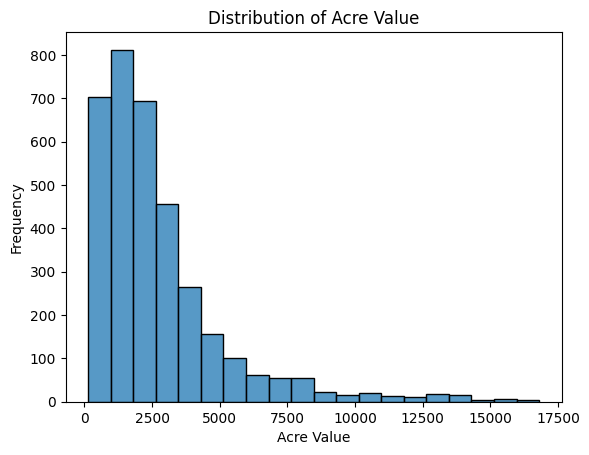

In [10]:
#Histogram of Acre value
sns.histplot(df["Acre Value"],bins=20)
plt.title("Distribution of Acre Value")
plt.xlabel("Acre Value")
plt.ylabel("Frequency")
plt.show()

**Lets analyze trends over time**

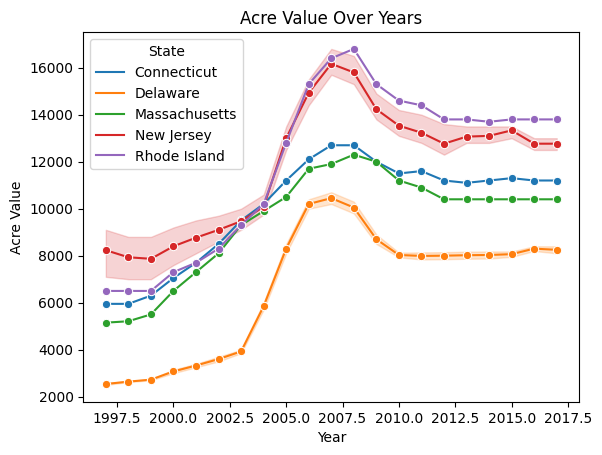

In [11]:
#First lets identify the top 5 states by average acre value

top = df.groupby("State")["Acre Value"].mean().sort_values(ascending=False).head(5).index

#Lets create a dataframe for the top states
df_top=df[df["State"].isin(top)]

#Linechart of Acre over Years
sns.lineplot(x="Year",y="Acre Value",data=df_top, hue="State", marker="o")
plt.title("Acre Value Over Years")
plt.xlabel=("Year")
plt.ylabel=("Acre Value")
plt.show()

**Lets compare land categories**

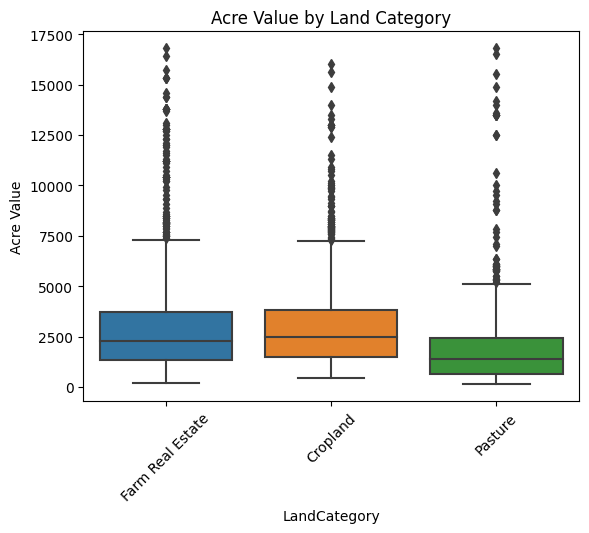

In [12]:
# Box plot of Acre Value by Land Category

sns.boxplot(x='LandCategory', y='Acre Value', data=df)
plt.title('Acre Value by Land Category')
plt.xticks(rotation=45)
plt.show()

***Lets Explore regional differences in land values.***

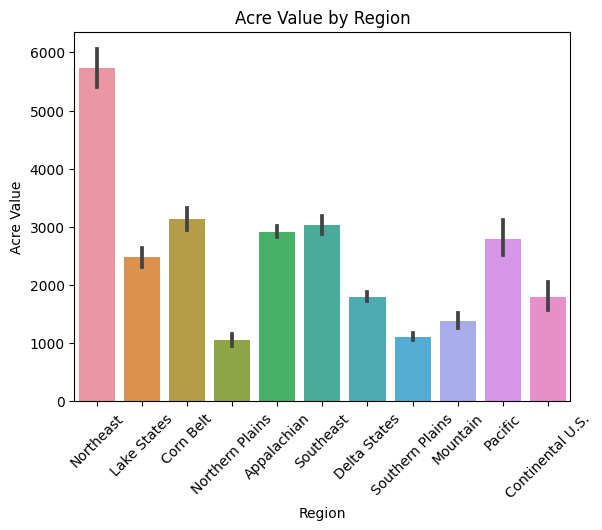

In [13]:
#Bar plot of Acre Value by Region
sns.barplot(x='Region', y='Acre Value', data=df)
plt.title('Acre Value by Region')
plt.xticks(rotation=45) 
plt.show()


**Correlation Analysis**

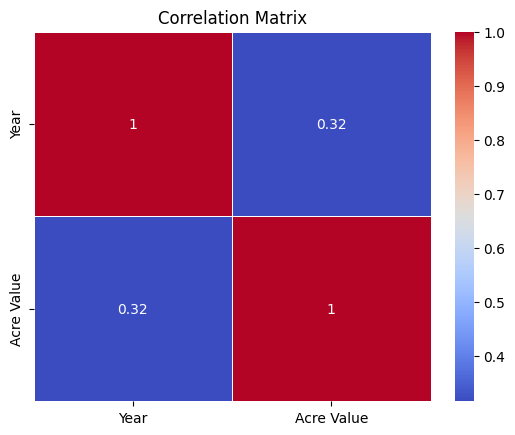

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**What is the distribution of land values?**

Ans: The histogram analysis reveals that the majority of land values fall within the range of 1000-1500 acre value

**When did the acre value reach its all-time high?**

Ans: The peak acre value occurred in the year 2006, representing a significant point in time when land values reached their highest level.

**Which category of lands has the highest acre value?**

Ans : Two distinct categories, namely "Farm Real Estate" and "Pasture," exhibit the highest average acre values.

**Which region has the highest acre value?**

Ans : The Northeast region displays consistent higher land values in comparison to other regions.

**Summary:**
* The distribution of land values is skewed, with a concentration in the range of 1000-1500 acre value.
* The year 2006 marked the peak in acre values, highlighting a specific time of significant value increase.
* "Farm Real Estate" and "Pasture" are the land categories with the highest average acre values.
* The Northeast region consistently exhibits higher land values compared to other regions.